In [14]:
import pandas as pd
import numpy as np
import glob
import dropbox as db
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from soccer_pitch import full_pitch

In [89]:
def box_map():
    # Create figure
    fig=plt.figure()
    fig.set_size_inches(16, 9)
    ax = fig.add_subplot(1,1,1)

    # Set color Scheme
    line_color = '#FAFAFA'
    fig.set_facecolor("#66BB6A")

    # Pitch Outline & Centre Line
    #plt.plot([0,0],[0,40], color="black")
    #plt.plot([0,80],[40,40], color="black")
    #plt.plot([-25,25],[25,25], color='white')
    plt.plot([-25,25],[0,0], color=line_color)

    # Penalty Area
    plt.plot([-22,22],[18,18], color=line_color)
    plt.plot([-22,-22],[0,18], color=line_color)
    plt.plot([22,22],[0,18], color=line_color)

    # 6-yard Box
    plt.plot([-10,10],[6,6], color=line_color)
    plt.plot([-10,-10],[0,6], color=line_color)
    plt.plot([10,10],[0,6], color=line_color)

    # Goal
    plt.plot([-4,4],[-2,-2], color=line_color)
    plt.plot([-4,-4],[0,-2], color=line_color)
    plt.plot([4,4],[0,-2], color=line_color)

    # Penalty Spot
    PenSpot = plt.Circle((0,12),0.5,color=line_color)
    ax.add_patch(PenSpot)

    # Penalty Arc
    penalty_arc = Arc((0,8.3),height=30,width=30,angle=90,theta1=310,theta2=50,color=line_color)
    ax.add_patch(penalty_arc)

    #Tidy Axes
    plt.axis('off')

In [90]:
def full_pitch(background, line, provider):
     # Create figure
    fig=plt.figure()
    fig.set_size_inches(16, 9)
    ax = fig.add_subplot(1,1,1)

     # Set color Scheme
    line_color = line
    fig.set_facecolor(background)

    # Set dimensions Instat
    if provider == "Instat":
        length = 105
        width = 68
        pen_area_x = 16.5
        pen_area_y = 13.85
        pen_area_y2 = 54.15
        six_yard_x = 5.5
        six_yard_y = 24.85
        six_yard_y2 = 43.15
        penalty_spot = [11,34]
    else:
        length = 120
        width = 80
        pen_area_x = 18
        pen_area_y = 18
        pen_area_y2 = 62
        six_yard_x = 6
        six_yard_y = 30
        six_yard_y2 = 50
        penalty_spot = [12,40]


    # Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=line_color)
    plt.plot([0,length],[width,width], color=line_color)
    plt.plot([length,length],[width,0], color=line_color)
    plt.plot([length,0],[0,0], color=line_color)
    plt.plot([length / 2, length / 2], [0, width], color=line_color)

    # Left Penalty Area
    plt.plot([0,pen_area_x], [pen_area_y, pen_area_y], color=line_color)
    plt.plot([0,pen_area_x], [pen_area_y2,pen_area_y2], color=line_color)
    plt.plot([pen_area_x,pen_area_x], [pen_area_y,pen_area_y2], color=line_color)

    # Left 6-yard Box
    plt.plot([0,six_yard_x], [six_yard_y, six_yard_y], color=line_color)
    plt.plot([0,six_yard_x], [six_yard_y2,six_yard_y2], color=line_color)
    plt.plot([six_yard_x,six_yard_x], [six_yard_y,six_yard_y2], color=line_color)

    # Left Penalty Spot
    PenSpot = plt.Circle(penalty_spot,0.5, color=line_color)
    ax.add_patch(PenSpot)

    # Left Penalty Arc
    penalty_arc = Arc(penalty_spot,height=18.3,width=18.3,angle=360,theta1=307,theta2=53, color=line_color)
    ax.add_patch(penalty_arc)

     # Right Penalty Area
    plt.plot([length,length - pen_area_x], [width - pen_area_y, width - pen_area_y], color=line_color)
    plt.plot([length, length - pen_area_x], [width - pen_area_y2, width - pen_area_y2], color=line_color)
    plt.plot([length - pen_area_x, length - pen_area_x], [width - pen_area_y, width - pen_area_y2], color=line_color)

    # Right 6-yard Box
    plt.plot([length, length - six_yard_x], [width - six_yard_y, width - six_yard_y], color=line_color)
    plt.plot([length, length - six_yard_x], [width - six_yard_y2, width - six_yard_y2], color=line_color)
    plt.plot([length - six_yard_x, length - six_yard_x], [width - six_yard_y, width - six_yard_y2], color=line_color)

    # Right Penalty Spot
    PenSpot = plt.Circle((length-penalty_spot[0], penalty_spot[1]),0.5, color=line_color)
    ax.add_patch(PenSpot)

    # Right Penalty Arc
    penalty_arc = Arc((length-penalty_spot[0], penalty_spot[1]),height=18.3,width=18.3,angle=180,theta1=307,theta2=53, color=line_color)
    ax.add_patch(penalty_arc)

    #Prepare Circles
    centreCircle = plt.Circle((length/2, width/2),9.15,color=line_color, fill=False)
    centreSpot = plt.Circle((length/2, width/2),0.8,color=line_color)
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
 
    #Tidy Axes
    plt.axis('off')

# Statsbomb Data

Todo: 
* Join related Events from goalkeeper actions with the respective action of the dataset. i.e. add the shot event to the goalkeeper event goal/save ...

In [53]:
filelocation = '/Users/matthiashugli/Dropbox/bucket/statsbomb-data/*.json'

df = pd.DataFrame()
for filename in glob.glob(filelocation):
    file = pd.read_json(filename)
    file.insert(1, 'filename', filename)
    df = df.append(file)

In [54]:
df['event_name'] = [v['name'] for k, v in df['type'].items()]
df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
statsbomb_gk = df[df['event_name'] == 'Goal Keeper']
statsbomb_gk = statsbomb_gk[['id', 'timestamp', 'related_events','player','location', 'goalkeeper', 'event_name', 'event_detail']]
statsbomb_gk['type'] = [v['type']['name'] for k, v in statsbomb_gk['goalkeeper'].items()]
statsbomb_gk = statsbomb_gk[statsbomb_gk['type'] != 'Shot Faced'].reset_index()
goalkeeper_exp = pd.json_normalize(statsbomb_gk['goalkeeper'])
goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
statsbomb_gk = statsbomb_gk.merge(goalkeeper_exp, left_index=True, right_index=True)
statsbomb_gk['related_events'] = [i[0] for i in statsbomb_gk['related_events']]
statsbomb_gk = statsbomb_gk.merge(df, left_on='related_events', right_on='id')
statsbomb_gk['type_y'] = [v['name'] for k, v in statsbomb_gk['type_y'].items()]
#statsbomb_gk.drop(columns=['index_x', 'goalkeeper_x', 'index_y', 'type.id', 'outcome.id', 'technique.id', 'position.id', 'body_part.id', 'type.name'], inplace=True)

In [55]:
shots = statsbomb_gk[['type_x', 'type_y', 'goalkeeper_x', 'shot', 'location_x', 'location_y', 'minute', 'player_x']]
shots = shots[shots['type_y'] == 'Shot']
shots['x_goalkeeper'] = [i[0] for i in shots['location_x']]
shots['y_goalkeeper'] = [i[1] for i in shots['location_x']]
shots['x_location'] = [i[0] for i in shots['location_y']]
shots['y_location'] = [i[1] for i in shots['location_y']]
#goalkeeper_exp = pd.json_normalize(shots['goalkeeper_x'])
#goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
#shots = shots.merge(goalkeeper_exp, left_index=True, right_index=True)
#shot_exp = pd.json_normalize(shots['shot'])
#shot_exp = shot_exp[shot_exp['outcome.name'].notna()].reset_index()
#shots = shots.merge(shot_exp, left_index=True, right_index=True)
#shots = shots[shots['open_goal'].isna()].reset_index()
shots['xG'] = [v['statsbomb_xg'] for k, v in shots['shot'].items()]
shots['goalkeeper'] = [v['name'] for k, v in shots['player_x'].items()]

shots = shots[['minute', 'goalkeeper', 'type_x', 'xG', 'x_goalkeeper', 'y_goalkeeper', 'x_location', 'y_location']]
shots['x_gk'] = shots['y_goalkeeper'] - 40
shots['y_gk'] = shots['x_goalkeeper']
shots['x_shot'] = 80 - shots['y_location'] -40
shots['y_shot'] = 120 - shots['x_location']
shots = shots.reset_index()
shots = shots[['minute','goalkeeper', 'type_x', 'xG', 'x_gk', 'y_gk', 'x_shot', 'y_shot']]

# Math Calculations
shots['shot_distance'] = np.sqrt( np.square(shots['x_shot']) + np.square(shots['y_shot']))
shots['gk_distance'] = np.sqrt(np.square(shots['x_shot'] - shots['x_gk']) + np.square(shots['y_shot'] - shots['y_gk']))
shots['shot_location'] = shots['x_shot'].apply(lambda x: 'frontal' if x < 4 and x > -4 else 'angle')

In [56]:
goals = shots[shots['type_x'] == 'Goal Conceded']
saves = shots[shots['type_x'] == 'Shot Saved']
short_dist = shots[shots['shot_distance'].between(9, 18)]

In [57]:
#shots.head()
len(shots)

63

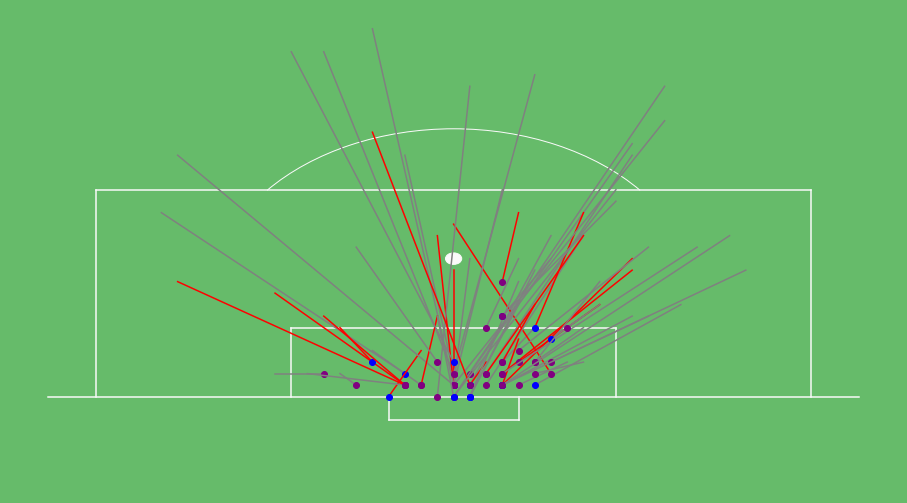

In [58]:
box_map()
for i in range(len(shots)):
    if shots['type_x'][i] == 'Shot Saved':
        hue_color = 'grey'
    else:
        hue_color = 'red'

    if shots['goalkeeper'][i] == 'Marc-André ter Stegen':
        gk_color = 'blue'
    else:
        gk_color = 'purple'
    
    plt.plot([int(shots['x_shot'][i]), int(shots['x_gk'][i])], [int(shots['y_shot'][i]), int(shots['y_gk'][i])], color=hue_color)

    plt.plot(int(shots['x_gk'][i]), int(shots['y_gk'][i]), 'o', color=gk_color)

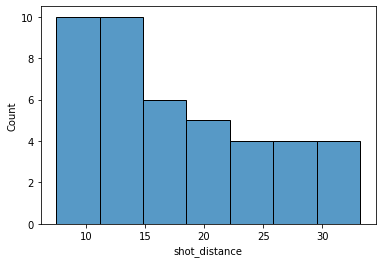

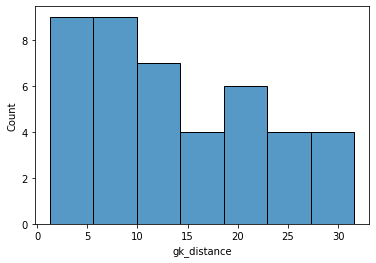

In [59]:
sns.histplot(data=saves, x='shot_distance')
plt.show()

sns.histplot(data=saves, x='gk_distance')
plt.show()

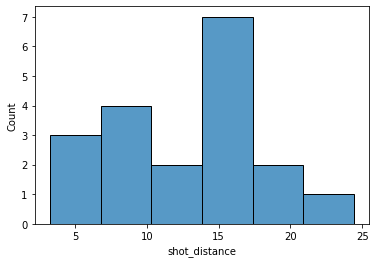

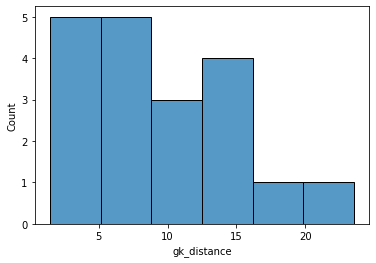

In [60]:
sns.histplot(data=goals, x='shot_distance')
plt.show()

sns.histplot(data=goals, x='gk_distance')
plt.show()

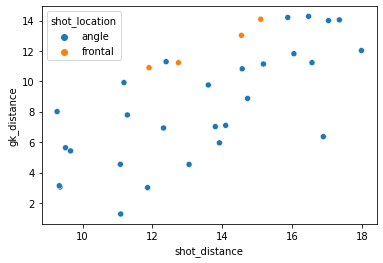

In [61]:
sns.scatterplot(data=short_dist, x='shot_distance', y='gk_distance', hue='shot_location')
plt.show()

# Instat Data

In [62]:
# Field dimension on Instat 105 x 68 y
url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=36&start_ms=0&match_id=1969128&lang_id=1&lang=&format=json'


df = pd.DataFrame()
file = pd.read_json(url)
df = df.append(file['data']['row'])

match_url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=35&tournament_id=78&season_id=28&date_start=&date_end=&lang_id=1&lang=&format=json'

match_df = pd.DataFrame()
file = pd.read_json(match_url)
match_df = match_df.append(file['data']['row'])

In [63]:
match_df[['id', 'match_date', 'team1_name', 'team2_name']]

,id,match_date,team1_name,team2_name
0,1969129,2021-10-31 18:30:00,Lausanne Sport,Luzern
1,1969130,2021-10-31 18:30:00,Lugano,Servette
2,1969131,2021-10-31 16:15:00,Sion,Grasshopper
3,1969133,2021-10-30 21:30:00,Zurich,Basel
4,1969132,2021-10-30 19:00:00,St. Gallen,Young Boys
5,1969127,2021-10-24 17:30:00,Servette,Sion
6,1969124,2021-10-24 17:30:00,Basel,Lugano
7,1969126,2021-10-24 15:15:00,Luzern,St. Gallen
8,1969125,2021-10-23 21:30:00,Grasshopper,Zurich
9,1969128,2021-10-23 19:00:00,Young Boys,Lausanne Sport


In [133]:
#df['action_name'].drop_duplicates().tail(50)
df[(df['action_name'].str.contains('Chance')) | (df['action_name'] == 'Assist')].drop_duplicates().iloc[:,0:20]

,id,number,action_id,action_name,player_id,player_name,team_id,team_name,position_id,position_name,half,second,standart_id,standart_name,ts,dl,pos_x,pos_y,opponent_id,opponent_name
430,23522,NaN,32020,Chances created,291564,Christian Fassnacht,359,Young Boys,NaN,NaN,1,589.74,NaN,NaN,2021-10-24 15:34:00,0,84.10,15.40,NaN,NaN
434,23524,NaN,32040,Chance was not converted by,215000,Theoson-Jordan Siebatcheu Pefok,359,Young Boys,NaN,NaN,1,591.47,NaN,NaN,2021-10-24 15:34:00,0,97.90,33.30,NaN,NaN
435,23525,NaN,32012,Chance unsuccessful,NaN,NaN,359,Young Boys,NaN,NaN,1,591.47,NaN,NaN,2021-10-24 15:34:00,0,97.90,33.30,NaN,NaN
546,23537,NaN,32030,Chance was converted by,352940,Silvan Hefti,359,Young Boys,NaN,NaN,1,761.84,NaN,NaN,2021-10-24 15:34:00,0,89.40,24.60,NaN,NaN
549,23540,NaN,32020,Chances created,352940,Silvan Hefti,359,Young Boys,NaN,NaN,1,761.84,NaN,NaN,2021-10-24 15:34:00,0,89.40,24.60,NaN,NaN
550,23541,NaN,32011,Chances successful,NaN,NaN,359,Young Boys,NaN,NaN,1,761.84,NaN,NaN,2021-10-24 15:34:00,0,89.40,24.60,NaN,NaN
607,23548,NaN,32020,Chances created,291564,Christian Fassnacht,359,Young Boys,NaN,NaN,1,955.83,NaN,NaN,2021-10-24 15:34:00,0,87.30,9.70,NaN,NaN
611,23549,NaN,32012,Chance unsuccessful,NaN,NaN,359,Young Boys,NaN,NaN,1,957.03,NaN,NaN,2021-10-24 15:34:00,0,92.60,25.50,NaN,NaN
612,23550,NaN,32040,Chance was not converted by,215000,Theoson-Jordan Siebatcheu Pefok,359,Young Boys,NaN,NaN,1,957.03,NaN,NaN,2021-10-24 15:34:00,0,92.60,25.50,NaN,NaN
1067,20919,NaN,1040,Assist,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,1,1881.17,1,Open play,2021-10-24 16:15:02,0,83.00,25.60,979749,Mohamed Zeki Amdouni


In [119]:
df[df['action_name'] == 'Goal'].iloc[:,0:15].reset_index()
#sample = df[df['id'] == '20471'][['action_name', 'player_name', 'opponent_name', 'pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y', 'gate_x', 'gate_y']]

,index,id,number,action_id,action_name,player_id,player_name,team_id,team_name,position_id,position_name,half,second,standart_id,standart_name,ts
0,544,20471,NaN,8010,Goal,352940,Silvan Hefti,359,Young Boys,52,Defender - Right,1,761.84,1,Open play,2021-10-24 16:15:02
1,1070,20923,NaN,8010,Goal,979749,Mohamed Zeki Amdouni,179,Lausanne Sport,36,Forward - Central,1,1883.45,1,Open play,2021-10-24 16:15:02
2,2141,21828,NaN,8010,Goal,440220,Fabian Rieder,359,Young Boys,43,Defensive midfielder - Right central,2,1853.57,4,Direct free kick,2021-10-24 16:15:02
3,2181,21868,NaN,8010,Goal,19024,Stjepan Kukuruzovic,179,Lausanne Sport,33,Defensive midfielder - Central,2,2099.74,6,Penalty,2021-10-24 16:15:02
4,2220,21903,NaN,8010,Goal,291564,Christian Fassnacht,359,Young Boys,54,Midfielder - Right,2,2190.72,1,Open play,2021-10-24 16:15:02


In [120]:
df['second'] = df['second'].astype(float)
df[df['second'].between(1875, 1890)].iloc[:, 0:20]

,id,number,action_id,action_name,player_id,player_name,team_id,team_name,position_id,position_name,half,second,standart_id,standart_name,ts,dl,pos_x,pos_y,opponent_id,opponent_name
1062,20914,NaN,22000,Ball receiving,1163345,Armel Zohouri,179,Lausanne Sport,52,Defender - Right,1,1875.01,1,Open play,2021-10-24 16:15:02,0,54.10,3.70,NaN,NaN
1063,20915,NaN,1011,Attacking pass accurate,1163345,Armel Zohouri,179,Lausanne Sport,52,Defender - Right,1,1876.46,1,Open play,2021-10-24 16:15:02,0,57.50,9.20,979749,Mohamed Zeki Amdouni
1064,20916,NaN,22000,Ball receiving,979749,Mohamed Zeki Amdouni,179,Lausanne Sport,36,Forward - Central,1,1877.71,1,Open play,2021-10-24 16:15:02,0,71.40,26.60,NaN,NaN
1065,20917,NaN,1011,Attacking pass accurate,979749,Mohamed Zeki Amdouni,179,Lausanne Sport,36,Forward - Central,1,1879.49,1,Open play,2021-10-24 16:15:02,0,80.90,24.90,473499,Cameron Puertas
1066,20918,NaN,22000,Ball receiving,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,1,1880.38,1,Open play,2021-10-24 16:15:02,0,79.70,33.10,NaN,NaN
1067,20919,NaN,1040,Assist,473499,Cameron Puertas,179,Lausanne Sport,24,Midfielder - Left central,1,1881.17,1,Open play,2021-10-24 16:15:02,0,83.00,25.60,979749,Mohamed Zeki Amdouni
1068,23593,NaN,32020,Chances created,473499,Cameron Puertas,179,Lausanne Sport,NaN,NaN,1,1881.17,NaN,NaN,2021-10-24 15:34:00,0,83.00,25.60,NaN,NaN
1069,20922,NaN,2051,Successful dribbling,979749,Mohamed Zeki Amdouni,179,Lausanne Sport,36,Forward - Central,1,1881.99,1,Open play,2021-10-24 16:15:02,0,89.70,21.50,388434,Mohamed Aly Camara
1070,20923,NaN,8010,Goal,979749,Mohamed Zeki Amdouni,179,Lausanne Sport,36,Forward - Central,1,1883.45,1,Open play,2021-10-24 16:15:02,0,94.70,29.20,199902,David von Ballmoos
1071,23594,NaN,23000,Playing in scoring attacks,1163345,Armel Zohouri,179,Lausanne Sport,52,Defender - Right,1,1883.45,1,Open play,2021-10-24 15:34:00,0,NaN,NaN,NaN,NaN


In [75]:
df[(df['position_name'] == 'Goalkeeper') & (df['action_name'] == 'Supersaves')].iloc[:,0:20].reset_index()
#df[df['action_name'] == 'Ball receiving'].iloc[:,0:15]
#df[df['position_name'] == 'Goalkeeper']['action_name'].drop_duplicates()

,index,id,number,action_id,action_name,player_id,player_name,team_id,team_name,position_id,...,half,second,standart_id,standart_name,ts,dl,pos_x,pos_y,opponent_id,opponent_name
0,1703,21464,NaN,13040,Supersaves,199902,David von Ballmoos,359,Young Boys,31,...,2,739.72,1,Open play,2021-10-24 16:15:02,0,0.70,37.00,NaN,NaN
1,1966,21682,NaN,13040,Supersaves,72840,Mory Diaw,179,Lausanne Sport,31,...,2,1464.51,1,Open play,2021-10-24 16:15:02,0,0.50,30.70,NaN,NaN
2,2160,21843,NaN,13040,Supersaves,199902,David von Ballmoos,359,Young Boys,31,...,2,1948.59,1,Open play,2021-10-24 16:15:02,0,1.10,37.40,NaN,NaN


In [66]:
df[df['position_name'] == 'Goalkeeper']
df.dropna(axis=1, how='all', inplace=True)

In [67]:
gk_set = df[['player_name', 'action_name', 'pos_x', 'pos_y', 'zone_name', 'attack_type_name', 'gate_x', 'gate_y', 'shot_type']]

In [68]:
gk_set[gk_set['player_name'] == 'Mory Diaw'].groupby('action_name').count()

,player_name,pos_x,pos_y,zone_name,attack_type_name,gate_x,gate_y,shot_type
action_name,,,,,,,,
Air challenge,1,1,1,1,1,0,0,0
Attacking pass accurate,25,25,25,25,15,0,0,0
Attacking pass inaccurate,6,6,6,6,0,0,0,0
Average position 1st half,1,1,1,0,0,0,0,0
Average position 2nd half,1,1,1,0,0,0,0,0
Average position Full match,1,1,1,0,0,0,0,0
Bad interception of goalkeeper,1,1,1,1,1,0,0,0
Ball receiving,11,11,11,11,7,0,0,0
Error leading to goal,1,1,1,1,0,0,0,0


In [69]:
gk_set[gk_set['action_name'] == 'Supersaves']

,player_name,action_name,pos_x,pos_y,zone_name,attack_type_name,gate_x,gate_y,shot_type
1703,David von Ballmoos,Supersaves,0.70,37.00,1B,Positional attack,NaN,NaN,NaN
1966,Mory Diaw,Supersaves,0.50,30.70,1B,Positional attack,NaN,NaN,NaN
2160,David von Ballmoos,Supersaves,1.10,37.40,1B,Positional attack,NaN,NaN,NaN


In [102]:
sample

,action_name,player_name,opponent_name,pos_x,pos_y,pos_dest_x,pos_dest_y,gate_x,gate_y
544,Goal,Silvan Hefti,Mory Diaw,89.40,24.60,105.00,37.30,-3.27,1.85


In [115]:
# 68 / 80 = 0.85
# 105 / 120 = 0.875
34 / 0.85

sample = sample[['pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y', 'gate_x', 'gate_y']].astype(float)
sample['x_shot'] = (80 - sample['pos_y'] / 0.85 - 40) * -1
sample['y_shot'] = 120 - sample['pos_x'] / 0.875
sample['final_x'] = 80 - sample['pos_dest_y'] / 0.85 -40
sample['final_y'] = 120 - sample['pos_dest_x'] / 0.875

<AxesSubplot:xlabel='final_x', ylabel='final_y'>

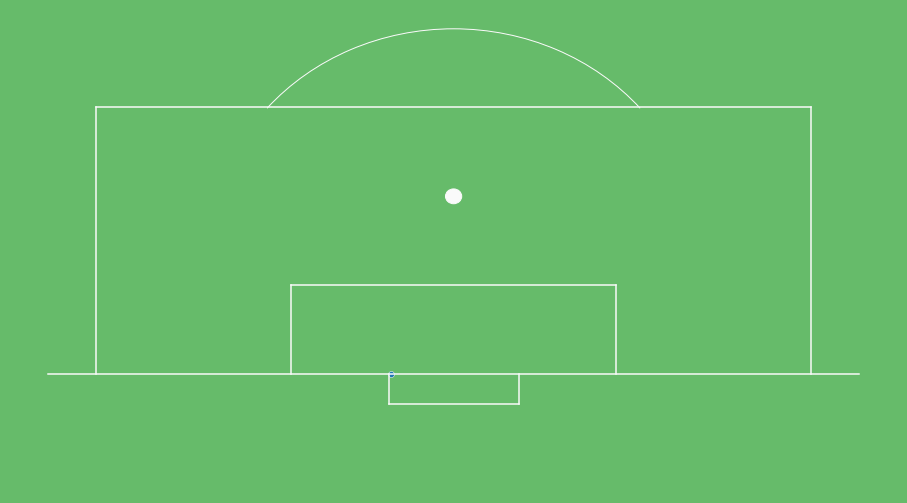

In [117]:
box_map()
sns.scatterplot(data=sample, x='final_x', y='final_y')


# Instat XML

In [ ]:
# Field dimension on Instat 105 x 68 y
url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=36&start_ms=0&match_id=1969128&lang_id=1&lang=&format=json'


df = pd.DataFrame()
file = pd.read_json(url)
df = df.append(file['data']['row'])

match_url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=35&tournament_id=78&season_id=28&date_start=&date_end=&lang_id=1&lang=&format=json'

match_df = pd.DataFrame()
file = pd.read_json(match_url)
match_df = match_df.append(file['data']['row'])

In [19]:
import xmltodict
import json
import xml.etree.ElementTree as etree

# Field dimension on Instat 105 x 68 y
source_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220221-56092-1yf07ds.xml'
large_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220119-89784-gbgtk8.xml'
filtered_export = '/Users/matthiashugli/Dropbox/bucket/sample-data/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220216-61331-brm4vi.xml'
#filtered_export = '/Users/matthiashugli/Dropbox/bucket/sample-data/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220217-48763-1if7ja.xml'
test_source = '/Users/matthiashugli/Downloads/test.xml'

#data = pd.read_xml(test_source)

prstree = etree.parse(filtered_export)
root = prstree.getroot()

event_items = []
event_subitems = []
all_events = []
header = ['start', 'end', 'player', 'x_pos', 'y_pos', 'team', 'action', 'half']

for r in root.iter('ALL_INSTANCES'):
    for inst in r.iter('instance'):
    
        start = inst.find('start').text
        end = inst.find('end').text
        player = inst.find('code').text

        if inst.find('pos_x') != None:
            x_pos = inst.find('pos_x').text
            y_pos = inst.find('pos_y').text
        
        event_items = [start, end, player, x_pos, y_pos]
        
        for label in inst.iter('label'):
            labels = label.find('text').text
            event_items.append(labels)

        all_events.append(event_items)

df = pd.DataFrame(all_events, columns=header)

In [20]:
data_types_dict = {'start': float, 'end': float, 'x_pos': float, 'y_pos': float}
df = df.astype(data_types_dict)

In [21]:
shots = df[df['action'] == 'Shots'].reset_index()

passes_before_shots = df.reset_index()
passes_before_shots.rename(columns={'index': 'id'}, inplace=True)
passes_before_shots['action-1'] = passes_before_shots.id.shift(1)
passes_before_shots['action-2'] = passes_before_shots.id.shift(2)
passes_before_shots['action-3'] = passes_before_shots.id.shift(3)
passes_before_shots['action-4'] = passes_before_shots.id.shift(4)
#passes_before_shots['action-5'] = passes_before_shots.id.shift(5)

melt_passes = pd.melt(passes_before_shots, id_vars=passes_before_shots.iloc[:,:8], value_vars=passes_before_shots.iloc[:,9:])
melt_passes = melt_passes[melt_passes['action'] == 'Shots']
melt_passes.dropna(subset=['value'], inplace=True)
melt_passes.merge(passes_before_shots, left_on='value', right_on='id')
melt_passes['value'] = melt_passes['value'].astype('int64')
merge_passes = melt_passes.merge(passes_before_shots, left_on='value', right_on='id').reset_index()

merge_passes['time_diff'] = (merge_passes['start_y'] - merge_passes['start_x'])
merge_passes['field_progression'] = merge_passes['x_pos_x'] - merge_passes['x_pos_y']

last_pass = merge_passes[(merge_passes['time_diff'] < 0) & (merge_passes['team_x'] == merge_passes['team_y'])] \
        .sort_values(by=['id_x', 'time_diff']).drop_duplicates(subset=['id_x'], keep='last')

shot_creation = shots.merge(last_pass[['id_x', 'x_pos_y', 'y_pos_y', 'action_y', 'time_diff']], how='left', left_on='index', right_on='id_x').drop(columns=['index', 'id_x', 'half'])

shot_creation

,start,end,player,x_pos,y_pos,team,action,x_pos_y,y_pos_y,action_y,time_diff
0,220.61,240.61,7. Bledian Krasniqi,87.0,47.1,Zurich,Shots,94.9,47.7,Passes accurate,-1.48
1,563.85,583.85,20. Olivier Custodio Da Costa,90.1,21.8,Lugano,Shots,96.9,2.4,Passes accurate,-3.38
2,944.34,964.34,15. Aiyegun Tosin,85.0,24.2,Zurich,Shots,76.8,42.4,Dribbling,-5.71
3,1266.13,1286.13,19. Nikola Boranijasevic,77.7,30.3,Zurich,Shots,NaN,NaN,NaN,NaN
4,1882.84,1902.84,10. Mattia Bottani,86.7,41.8,Lugano,Shots,92.1,50.4,Passes accurate,-2.01
5,2364.38,2384.38,31. Ignacio Santiago Aliseda,92.7,30.5,Lugano,Shots,92.5,16.7,Passes accurate,-1.41
6,2605.57,2625.57,9. Assan Torrez Ceesay,93.0,43.2,Zurich,Shots,93.6,50.3,Picking-ups,-1.50
7,2989.83,3009.83,10. Antonio Marchesano,79.8,22.4,Zurich,Shots,NaN,NaN,NaN,NaN
8,3284.76,3304.76,3. Reto Ziegler,93.6,33.6,Lugano,Shots,NaN,NaN,NaN,NaN
9,3358.07,3378.07,9. Assan Torrez Ceesay,80.5,18.3,Zurich,Shots,66.2,6.6,Dribbling,-5.76


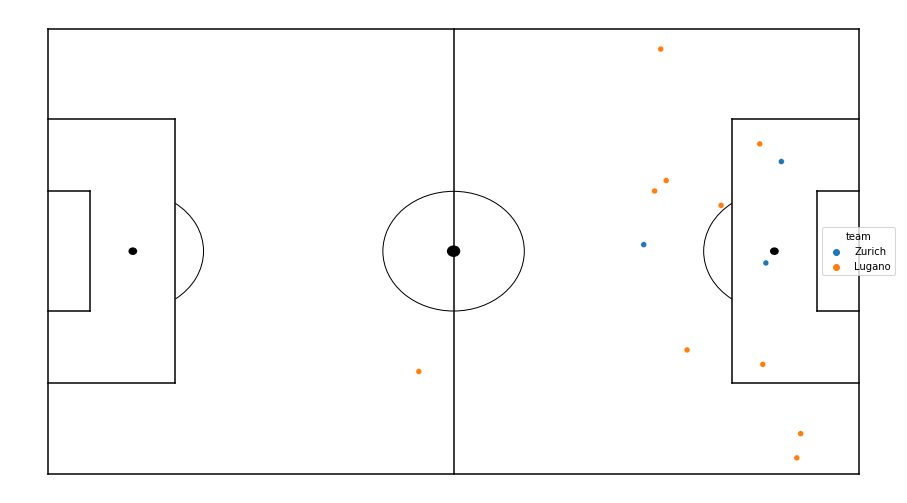

In [22]:
full_pitch("white", "black", "Instat")
sns.scatterplot(x='x_pos_y', y='y_pos_y', data=shot_creation[shot_creation['action_y'].isin(['Passes accurate', 'Passes (inaccurate)'])], hue='team')
plt.show()

In [306]:
#actions_lookat = ['Shots', 'Shot on target', 'Wide shot', 'Dribbling', 'Passes accurate', 'Passes (inaccurate)', 'Crosses (accurate)', 'Crosses (inaccurate)', 'Picking-ups', 'Interceptions', 'Penalty attack']
#actions_lookat = ['Goals', 'Shots', 'Shot on target', 'Wide shot', 'Dribbling', 'Passes accurate', 'Passes (inaccurate)', 'Crosses (accurate)', 'Crosses (inaccurate)', 'Picking-ups', 'Interceptions', 'Penalty attack', 'Assists']

#box_passes = df[(df.action.isin(actions_lookat)) & (df.team == 'Young Boys')].reset_index()
box_passes = df.reset_index()
box_passes.rename(columns={'index': 'id'}, inplace=True)
box_passes['action-1'] = box_passes.id.shift(1)
box_passes['action-2'] = box_passes.id.shift(2)
box_passes['action-3'] = box_passes.id.shift(3)
box_passes['action-4'] = box_passes.id.shift(4)
box_passes['action-5'] = box_passes.id.shift(5)
box_passes['action+1'] = box_passes.id.shift(-1)
box_passes['action+2'] = box_passes.id.shift(-2)
box_passes['action+3'] = box_passes.id.shift(-3)
box_passes['action+4'] = box_passes.id.shift(-4)
#box_passes = box_passes[box_passes.action == 'Shots']
#box_passes['id_diff'] = box_passes.id -  box_passes.id.shift(1)
#df[df.action.isin(['Shot on target (saved)', 'Wide shot (Goalkeepers)', 'Goals conceded'])]
#sandbox = df[2423:2443] # one Situation with Pass Rieder --> Pass Fasnacht --> Shot Garcia
#box_passes = df[df.action == 'Passes into the penalty box']
#specific_chance
#sandbox

# Interessante Situation Direktschuss Mahou - Save Dävu df[2423:2443]

In [292]:
melt_box_passes = pd.melt(box_passes, id_vars=box_passes.iloc[:,:9], value_vars=box_passes.iloc[:,10:])
melt_box_passes = melt_box_passes[melt_box_passes['action'] == 'Shots']
melt_box_passes.dropna(subset=['value'], inplace=True)
melt_box_passes.merge(box_passes, left_on='value', right_on='id')
melt_box_passes['value'] = melt_box_passes['value'].astype('int64')
merge_box_passes = melt_box_passes.merge(box_passes, left_on='value', right_on='id').reset_index()
merge_box_passes.drop(columns=['action-1', 'action-2', 'action-3', 'action-4', 'action-5', 'action+1', 'action+2',
'action+3', 'action+4', 'action-1', 'action-1', 'value', 'index', 'half_y'], inplace=True)

In [293]:
merge_box_passes['time_diff'] = (merge_box_passes['start_y'] - merge_box_passes['start_x'])
merge_box_passes['field_progression'] = merge_box_passes['x_pos_x'] - merge_box_passes['x_pos_y']
#merge_box_passes['creating_assist'] = np.where()

In [294]:
chance_creation = merge_box_passes[(merge_box_passes['time_diff'] < 0) & (merge_box_passes['team_x'] == merge_box_passes['team_y']) \
    & (merge_box_passes['action_y'].isin(['Passes accurate', 'Passes (inaccurate)']))] \
        .sort_values(by=['id_x', 'time_diff']).drop_duplicates(subset=['id_x'], keep='last')
#chance_creation['time_diff'].mean() + (chance_creation['time_diff'].std() * -1) * 2
chance_creation

# if diff 0 and free-kick then free-kick

,id_x,start_x,end_x,player_x,x_pos_x,y_pos_x,team_x,action_x,half_x,variable,id_y,start_y,end_y,player_y,x_pos_y,y_pos_y,team_y,action_y,time_diff,field_progression
24,53,220.61,240.61,7. Bledian Krasniqi,87.0,47.1,Zurich,Shots,1st half,action-3,50,219.13,239.13,9. Assan Torrez Ceesay,94.9,47.7,Zurich,Passes accurate,-1.48,-7.9
1,147,563.85,583.85,20. Olivier Custodio Da Costa,90.1,21.8,Lugano,Shots,1st half,action-2,145,560.47,580.47,27. Kevin Ruegg,96.9,2.4,Lugano,Passes accurate,-3.38,-6.8
2,228,944.34,964.34,15. Aiyegun Tosin,85.0,24.2,Zurich,Shots,1st half,action-2,226,937.58,957.58,7. Bledian Krasniqi,59.0,45.8,Zurich,Passes accurate,-6.76,26.0
4,464,1882.84,1902.84,10. Mattia Bottani,86.7,41.8,Lugano,Shots,1st half,action-2,462,1880.83,1900.83,20. Olivier Custodio Da Costa,92.1,50.4,Lugano,Passes accurate,-2.01,-5.4
5,573,2364.38,2384.38,31. Ignacio Santiago Aliseda,92.7,30.5,Lugano,Shots,1st half,action-2,571,2362.97,2382.97,10. Mattia Bottani,92.5,16.7,Lugano,Passes accurate,-1.41,0.2
30,641,2605.57,2625.57,9. Assan Torrez Ceesay,93.0,43.2,Zurich,Shots,1st half,action-3,638,2601.73,2621.73,19. Nikola Boranijasevic,91.9,45.3,Zurich,Passes (inaccurate),-3.84,1.1
57,799,3358.07,3378.07,9. Assan Torrez Ceesay,80.5,18.3,Zurich,Shots,2nd half,action-4,795,3346.25,3366.25,25. Yanick Brecher,13.8,32.8,Zurich,Passes accurate,-11.82,66.7
60,931,3858.59,3878.59,24. Sandi Lovric,75.6,33.1,Lugano,Shots,2nd half,action-4,927,3855.82,3875.82,27. Kevin Ruegg,97.4,6.1,Lugano,Passes (inaccurate),-2.77,-21.8
13,959,4036.20,4056.20,19. Zan Celar,82.3,16.8,Lugano,Shots,2nd half,action-2,957,4028.62,4048.62,27. Kevin Ruegg,47.1,7.7,Lugano,Passes accurate,-7.58,35.2
38,986,4185.32,4205.32,18. Maren Haile-Selassie,79.8,29.3,Lugano,Shots,2nd half,action-3,983,4181.08,4201.08,14. Jonathan Maximiliano Sabbatini,80.0,44.8,Lugano,Passes accurate,-4.24,-0.2


In [116]:
melt_box_passes = pd.melt(box_passes, id_vars=box_passes.iloc[:,:9], value_vars=box_passes.iloc[:,10:])
melt_box_passes.dropna(subset=['value'], inplace=True)
melt_box_passes.merge(box_passes, left_on='value', right_on='id')
melt_box_passes['value'] = melt_box_passes['value'].astype('int64')
merge_box_passes = melt_box_passes.merge(box_passes, left_on='value', right_on='id').reset_index()
merge_box_passes.drop(columns=['action-1', 'action-2', 'action-3', 'action-4', 'action-5', 'action+1', 'action+2',
'action+3', 'action+4', 'action-1', 'action-1', 'value', 'index', 'half_y'], inplace=True)
merge_box_passes['start_x'] = merge_box_passes['start_x'] / 60
merge_box_passes['end_x'] = merge_box_passes['end_x'] / 60
merge_box_passes['start_y'] = merge_box_passes['start_y'] / 60
merge_box_passes['end_y'] = merge_box_passes['end_y'] / 60
merge_box_passes['time_diff'] = (merge_box_passes['start_x'] - merge_box_passes['start_y'])
merge_box_passes['field_progression'] = merge_box_passes['x_pos_x'] - merge_box_passes['x_pos_y']

# Creating Shot and Goal model
### Needs to cleaned up and concat
shots = merge_box_passes[(merge_box_passes.action_x == 'Shots') & (merge_box_passes['time_diff'] == 0)]
goals = box_passes[box_passes.action == 'Goals']

In [119]:
shots[:40]

,id_x,start_x,end_x,player_x,x_pos_x,y_pos_x,team_x,action_x,half_x,variable,id_y,start_y,end_y,player_y,x_pos_y,y_pos_y,team_y,action_y,time_diff,field_progression
398,53,3.676833,4.010167,7. Bledian Krasniqi,87.0,47.1,Zurich,Shots,1st half,action-2,51,3.676833,4.010167,26. Amir Saipi,18.0,20.9,Lugano,Wide shot (Goalkeepers),0.0,69.0
1178,147,9.397500,9.730833,20. Olivier Custodio Da Costa,90.1,21.8,Lugano,Shots,1st half,action+1,148,9.397500,9.730833,25. Yanick Brecher,14.9,46.2,Zurich,Wide shot (Goalkeepers),0.0,75.2
1826,228,15.739000,16.072333,15. Aiyegun Tosin,85.0,24.2,Zurich,Shots,1st half,action+1,229,15.739000,16.072333,15. Aiyegun Tosin,85.0,24.2,Zurich,Wide shot,0.0,0.0
1835,228,15.739000,16.072333,15. Aiyegun Tosin,85.0,24.2,Zurich,Shots,1st half,action+2,230,15.739000,16.072333,26. Amir Saipi,20.0,43.8,Lugano,Wide shot (Goalkeepers),0.0,65.0
2294,290,21.102167,21.435500,19. Nikola Boranijasevic,77.7,30.3,Zurich,Shots,1st half,action-2,288,21.102167,21.435500,26. Amir Saipi,27.3,37.7,Lugano,Wide shot (Goalkeepers),0.0,50.4
5130,641,43.426167,43.759500,9. Assan Torrez Ceesay,93.0,43.2,Zurich,Shots,1st half,action+1,642,43.426167,43.759500,9. Assan Torrez Ceesay,93.0,43.2,Zurich,Wide shot,0.0,0.0
5139,641,43.426167,43.759500,9. Assan Torrez Ceesay,93.0,43.2,Zurich,Shots,1st half,action+2,643,43.426167,43.759500,26. Amir Saipi,12.0,24.8,Lugano,Wide shot (Goalkeepers),0.0,81.0
5148,641,43.426167,43.759500,9. Assan Torrez Ceesay,93.0,43.2,Zurich,Shots,1st half,action+3,644,43.426167,43.759500,9. Assan Torrez Ceesay,93.0,43.2,Zurich,Picking-ups,0.0,0.0
5870,737,49.830500,50.163833,10. Antonio Marchesano,79.8,22.4,Zurich,Shots,2nd half,action-2,735,49.830500,50.163833,10. Antonio Marchesano,79.8,22.4,Zurich,Picking-ups,0.0,0.0
5898,737,49.830500,50.163833,10. Antonio Marchesano,79.8,22.4,Zurich,Shots,2nd half,action+1,738,49.830500,50.163833,10. Antonio Marchesano,79.8,22.4,Zurich,Shot on target,0.0,0.0


In [96]:
#merge_box_passes['in_frame'] = np.where(merge_box_passes['end_y'] > merge_box_passes['start_x'], 1,0)
merge_box_passes['end_diff'] = (merge_box_passes['end_x'] - merge_box_passes['end_y'])
merge_box_passes['start_end_diff'] = (merge_box_passes['start_x'] - merge_box_passes['end_y'])
merge_box_passes['end_start_diff'] = (merge_box_passes['end_x'] - merge_box_passes['start_y'])
#merge_box_passes.drop(columns=['team_x', 'half_x', 'variable', 'team_y'], inplace=True)

In [103]:
df[760:790].sort_values(by=['start', 'action'])
# Goals : 605, 1389, 3075, 3138, 1367
# Shots : 1860, 2044, 2119, 2218, 2290, 2439, 2619
#df[df['player'] == '3. Reto Ziegler'][0:60]
merge_box_passes.head()
#merge_box_passes[merge_box_passes.id_x == 5614]

# Fasnacht Goal (4967.25 / 60)
# Puertas Dribbling 1108.35 / 60
# Puertas Interception 2710.05 / 60
# Garcias Schuss 4255.67 / 60

,id_x,start_x,end_x,player_x,x_pos_x,y_pos_x,team_x,action_x,half_x,variable,...,player_y,x_pos_y,y_pos_y,team_y,action_y,time_diff,field_progression,end_diff,start_end_diff,end_start_diff
0,3,0.5760,0.909333,30. Fabio Daprela,27.1,46.8,Lugano,Passes accurate,1st half,action-2,...,10. Antonio Marchesano,52.5,34.0,Zurich,Passes accurate,0.574167,-25.4,0.574167,0.240833,0.9075
1,4,0.6525,0.985833,4. Kreshnik Hajrizi,27.4,18.7,Lugano,Passes accurate,1st half,action-3,...,10. Antonio Marchesano,52.5,34.0,Zurich,Passes accurate,0.650667,-25.1,0.650667,0.317333,0.9840
2,5,0.7235,1.056833,26. Amir Saipi,12.5,26.9,Lugano,Passes accurate,1st half,action-4,...,10. Antonio Marchesano,52.5,34.0,Zurich,Passes accurate,0.721667,-40.0,0.721667,0.388333,1.0550
3,6,0.7645,1.097833,6. Fidan Aliti,48.4,54.1,Zurich,Passes accurate,1st half,action-5,...,10. Antonio Marchesano,52.5,34.0,Zurich,Passes accurate,0.762667,-4.1,0.762667,0.429333,1.0960
4,4,0.6525,0.985833,4. Kreshnik Hajrizi,27.4,18.7,Lugano,Passes accurate,1st half,action-2,...,31. Mirlind Kryeziu,32.3,32.4,Zurich,Passes accurate,0.577167,-4.9,0.577167,0.243833,0.9105


In [97]:
last_pass = merge_box_passes[(merge_box_passes.action_x.isin(['Shots', 'Goals'])) & (merge_box_passes.team_x == merge_box_passes.team_y) & 
(merge_box_passes.action_y.isin(['Passes accurate', 'Crosses (accurate)', 'Dribbling', 'Interceptions', 'Picking-ups', 'Assists'])) & (merge_box_passes['time_diff'] > 0)].reset_index()
#(merge_box_passes.action_y.isin(['Passes accurate', 'Crosses (accurate)'])) & (merge_box_passes['time_diff'] > 0)].reset_index()
#last_pass.set_index('id_x', inplace=True)
#last_pass = merge_box_passes[(merge_box_passes.action_x.isin(['Shots', 'Goals'])) & (merge_box_passes.team_x == merge_box_passes.team_y)].sort_values('id_x')
#last_pass.pivot(index=last_pass.iloc[:,:8], columns='variable', values=['id_y', 'action_y', 'player_y', 'time_diff']).head()
#last_pass.head()
#last_pass.iloc[:5,8:]
#merge_box_passes[(merge_box_passes.player_x == '16. Christian Fassnacht') & (merge_box_passes.player_y == '16. Christian Fassnacht')]
#merge_box_passes[merge_box_passes.action_x == 'Goals']
#df.loc[0:50]
#df.loc[2390:2412]

In [98]:
last_pass.tail(20)


,index,id_x,start_x,end_x,player_x,x_pos_x,y_pos_x,team_x,action_x,half_x,...,player_y,x_pos_y,y_pos_y,team_y,action_y,time_diff,field_progression,end_diff,start_end_diff,end_start_diff
43,8457,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,61.2,62.6,Zurich,Interceptions,0.815333,37.8,0.815333,0.482000,1.148667
44,8464,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,3. Adrian Guerrero Aguilar,68.0,64.8,Zurich,Picking-ups,0.797333,31.0,0.797333,0.464000,1.130667
45,8471,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,3. Adrian Guerrero Aguilar,66.1,63.8,Zurich,Passes accurate,0.795000,32.9,0.795000,0.461667,1.128333
46,8478,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,70.7,62.4,Zurich,Dribbling,0.777667,28.3,0.777667,0.444333,1.111000
47,8649,1181,85.090500,85.423833,18. Blaz Kramer,94.0,38.7,Zurich,Shots,2nd half,...,16. Marc Hornschuh,58.7,27.3,Zurich,Passes accurate,0.148833,35.3,0.148833,-0.184500,0.482167
48,8656,1181,85.090500,85.423833,18. Blaz Kramer,94.0,38.7,Zurich,Shots,2nd half,...,20. Ousmane Doumbia,77.5,15.3,Zurich,Dribbling,0.121000,16.5,0.121000,-0.212333,0.454333
49,8663,1181,85.090500,85.423833,18. Blaz Kramer,94.0,38.7,Zurich,Shots,2nd half,...,20. Ousmane Doumbia,94.8,18.1,Zurich,Passes accurate,0.068167,-0.8,0.068167,-0.265167,0.401500
50,8670,1181,85.090500,85.423833,18. Blaz Kramer,94.0,38.7,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,92.9,32.2,Zurich,Passes accurate,0.053833,1.1,0.053833,-0.279500,0.387167
51,8977,1240,88.948667,89.282000,22. Degnand Wilfried Gnonto,89.9,46.4,Zurich,Shots,2nd half,...,39. Akaki Gogia,43.4,19.2,Zurich,Interceptions,0.169667,46.5,0.169667,-0.163667,0.503000
52,8984,1240,88.948667,89.282000,22. Degnand Wilfried Gnonto,89.9,46.4,Zurich,Shots,2nd half,...,39. Akaki Gogia,46.0,21.3,Zurich,Passes accurate,0.135667,43.9,0.135667,-0.197667,0.469000


In [99]:
pass_df = pd.DataFrame()
for id in last_pass['id_x']:
    pass_df = pass_df.append(last_pass[(last_pass['id_x'] == id)].sort_values(['time_diff', 'action_y']).drop_duplicates(['id_x'], keep='first'))

In [102]:
#pass_df.groupby('action_y').count()
pass_df[40:]

,index,id_x,start_x,end_x,player_x,x_pos_x,y_pos_x,team_x,action_x,half_x,...,player_y,x_pos_y,y_pos_y,team_y,action_y,time_diff,field_progression,end_diff,start_end_diff,end_start_diff
42,7622,1036,72.399500,72.732833,19. Zan Celar,87.0,24.6,Lugano,Shots,2nd half,...,16. Numa Lavanchy,82.7,18.9,Lugano,Passes accurate,0.048167,4.3,0.048167,-0.285167,0.381500
42,7622,1036,72.399500,72.732833,19. Zan Celar,87.0,24.6,Lugano,Shots,2nd half,...,16. Numa Lavanchy,82.7,18.9,Lugano,Passes accurate,0.048167,4.3,0.048167,-0.285167,0.381500
42,7622,1036,72.399500,72.732833,19. Zan Celar,87.0,24.6,Lugano,Shots,2nd half,...,16. Numa Lavanchy,82.7,18.9,Lugano,Passes accurate,0.048167,4.3,0.048167,-0.285167,0.381500
46,8478,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,70.7,62.4,Zurich,Dribbling,0.777667,28.3,0.777667,0.444333,1.111000
46,8478,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,70.7,62.4,Zurich,Dribbling,0.777667,28.3,0.777667,0.444333,1.111000
46,8478,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,70.7,62.4,Zurich,Dribbling,0.777667,28.3,0.777667,0.444333,1.111000
46,8478,1153,84.096667,84.430000,31. Mirlind Kryeziu,99.0,38.1,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,70.7,62.4,Zurich,Dribbling,0.777667,28.3,0.777667,0.444333,1.111000
50,8670,1181,85.090500,85.423833,18. Blaz Kramer,94.0,38.7,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,92.9,32.2,Zurich,Passes accurate,0.053833,1.1,0.053833,-0.279500,0.387167
50,8670,1181,85.090500,85.423833,18. Blaz Kramer,94.0,38.7,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,92.9,32.2,Zurich,Passes accurate,0.053833,1.1,0.053833,-0.279500,0.387167
50,8670,1181,85.090500,85.423833,18. Blaz Kramer,94.0,38.7,Zurich,Shots,2nd half,...,22. Degnand Wilfried Gnonto,92.9,32.2,Zurich,Passes accurate,0.053833,1.1,0.053833,-0.279500,0.387167


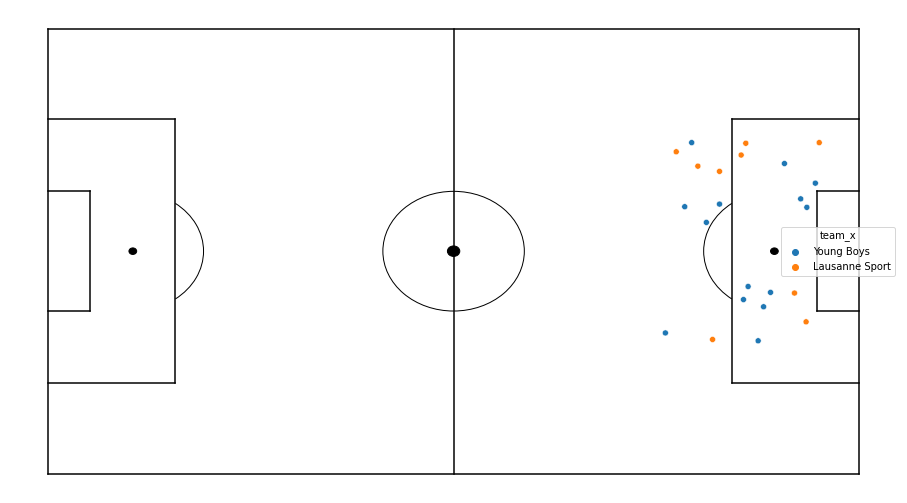

In [349]:
full_pitch("white", "black", "Instat")
sns.scatterplot(x='x_pos_x', y='y_pos_y', data=shots, hue='team_x')
plt.show()

In [7]:
df.action.unique()

array(['Passes accurate', 'Positional attacks', 'Dribbling',
       'Challenges (won)', 'Challenges (lost)', None, 'Lost balls',
       'Lost balls (in opp. half)', 'Bad ball control', 'Picking-ups',
       'Counter-attacks', 'Picking-ups (in opp. half)', 'Wide shot',
       'Shots', 'Wide shot (Goalkeepers)', 'Passes (inaccurate)',
       'Key passes (inaccurate)', 'Interceptions', 'Fouls',
       'Interceptions (in opp. half)', 'Tackles (Successful actions)',
       'Air challenges (won)', 'Air challenges (lost)',
       'Tackles (Unsuccessful actions)', 'Dribbles (Successful actions)',
       'Passes into the penalty box', 'Goal-kicks',
       'Crosses (inaccurate)', 'Offsides', 'Crosses (accurate)',
       'Key passes (accurate)', 'Goals', 'Goals conceded',
       'Errors leading to goal', 'Errors',
       'Dribbles (Unsuccessful actions)', 'Free-kick attacks',
       'Corner attacks', 'Assists', 'Shot on target (saved)',
       'Supersaves', 'Shot on target', 'Penalty', 'Penalty a

In [275]:
instat_goals = df.loc[df['action'] == 'Goals']
instat_goals['x_shot'] = instat_goals['y_pos'] - 34
instat_goals['y_shot'] = 105 - instat_goals['x_pos']
instat_goals.reset_index()

instat_goals_gk = df.loc[df.action == 'Goals conceded']
instat_goals_gk['x_gk'] = 68 - instat_goals_gk['y_pos'] - 34
instat_goals_gk['y_gk'] = instat_goals_gk['x_pos']
instat_goals_gk.reset_index()

,index,start,end,player,x_pos,y_pos,team,action,half,x_gk,y_gk


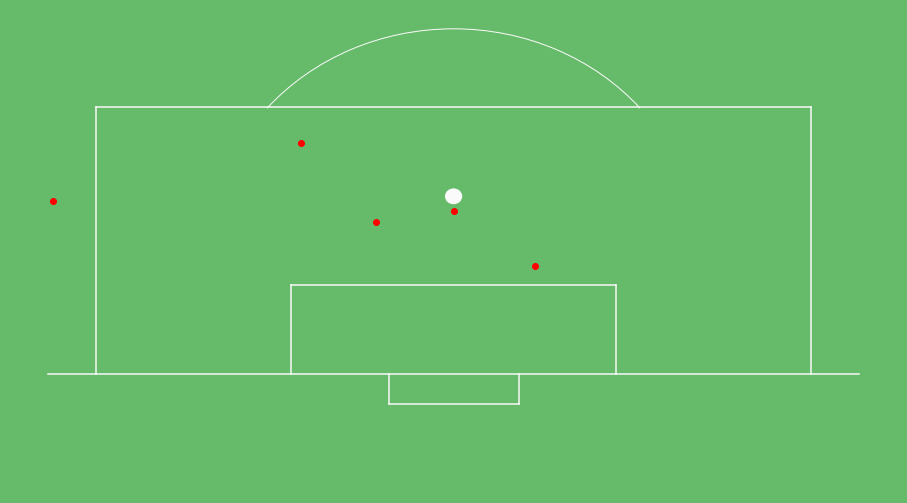

In [263]:
box_map()
plt.scatter(instat_goals['x_shot'], instat_goals['y_shot'], color=hue_color)
#plt.scatter(instat_goals_gk['x_gk'], instat_goals_gk['y_gk'], color=hue_color)